# Training and Visualizing a Decision Tree

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
sns.set_style("white")

## The Iris Dataset

In [2]:
iris = pd.read_csv("https://www.palmetto.clemson.edu/dsci/datasets/Iris/iris.csv")

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Visualize 

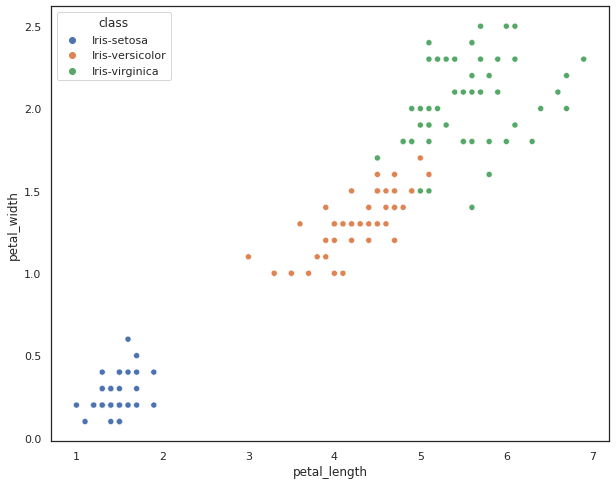

In [5]:
fig, ax = plt.subplots(figsize=(10,8))
_ = sns.scatterplot(x='petal_length', y='petal_width', hue='class', data=iris, ax=ax)
plt.show()

## Classification with Decision Tree Classifier

In [6]:
cat_class = iris['class'].astype('category').cat

In [7]:
from sklearn.tree import DecisionTreeClassifier
X = iris[["petal_length", "petal_width"]]
y = iris[["class"]]
tree_clf = DecisionTreeClassifier(max_depth=2, criterion='entropy')
tree_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

### Classification accuracy

In [8]:
# help(tree_clf.score)

In [9]:
print("Accuracy on training data = ", tree_clf.score(X, y))

Accuracy on training data =  0.96


## Visualize the Decision Tree

1. Import libraries

In [10]:
from sklearn.tree import export_graphviz
from IPython.display import SVG, display
import graphviz
import pydotplus

2. save decision tree to a dot file

DOT is a graph description language. See http://www.graphviz.org/pdf/dotguide.pdf for more information.

In [11]:
export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.columns[2:4],
    class_names=cat_class.categories,
    rounded=True,
    filled=True
)

3. convert dot file to svg file

In [12]:
graph_a = pydotplus.graph_from_dot_file('iris_tree.dot')
graph_a.write_svg('iris_tree.svg')

True

4. display SVG file

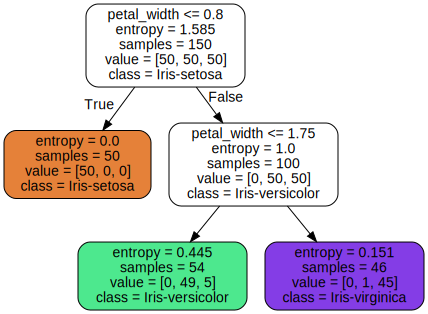

In [13]:
from IPython.display import SVG, display
display(SVG("iris_tree.svg"))

## Overfitting Problem

In [14]:
from IPython.display import SVG, Image, display
from io import StringIO

def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, 
                    feature_names=features, class_names=classn, filled=filled)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return(graph)

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris[['class']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
tree_clf = DecisionTreeClassifier(criterion='entropy')
tree_clf.fit(X_train, y_train)

print("accuracy on training set: {:.3f}".format(tree_clf.score(X_train, y_train)))
print("accuracy on testing  set: {:.3f}".format(tree_clf.score(X_test, y_test)))

DecisionTreeClassifier(criterion='entropy')

accuracy on training set: 1.000
accuracy on testing  set: 0.967


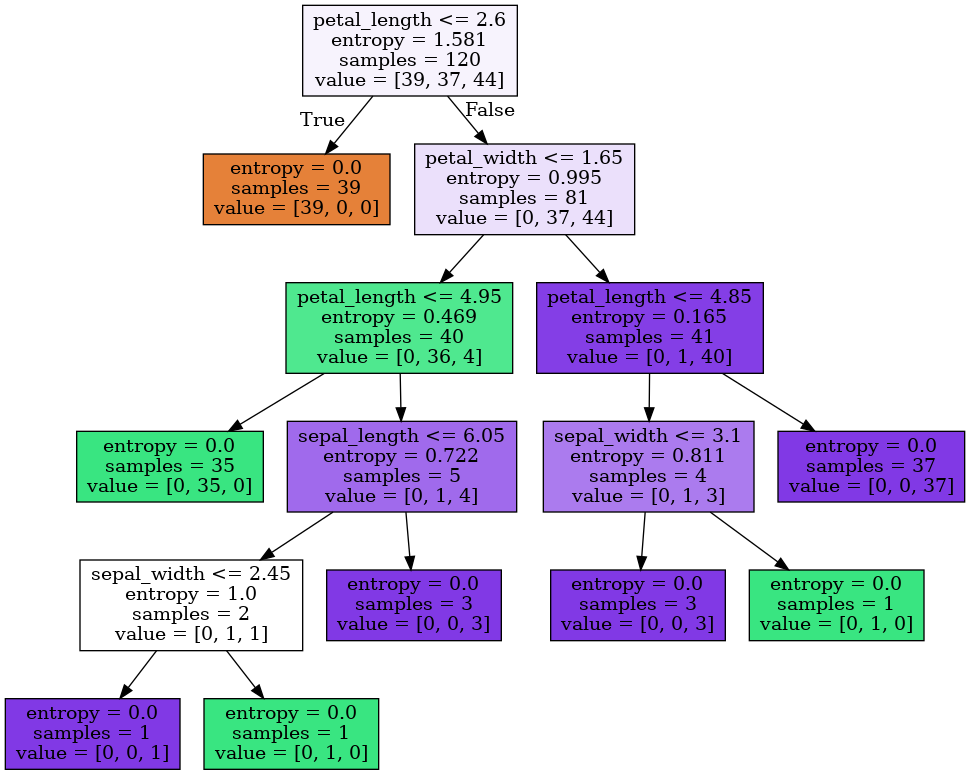

In [16]:
graph = print_tree(tree_clf, X.columns)
Image(graph.create_png())

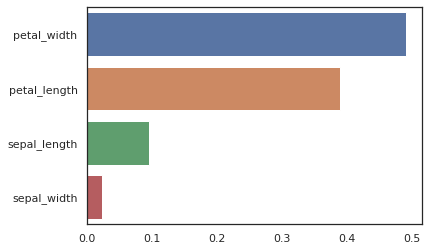

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                test_size=0.2, random_state=1)
clf = RandomForestClassifier()
_ = clf.fit(X_train, y_train)
feature_importances = pd.Series(clf.feature_importances_, 
                                  index=X.columns).sort_values(ascending=False)
_ = sns.barplot(x=feature_importances.values, y=feature_importances.index)

# Draw Decision Boundaries for a two-feature classification model

# Convert class label to numeric code

In [17]:
class_cat = iris['class'].astype('category').cat

In [18]:
cat_class.categories

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')

In [19]:
cat_class.codes

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int8

In [20]:
iris['label'] = cat_class.codes

# Classification

In [21]:
from sklearn.tree import DecisionTreeClassifier

X = iris[["petal_length", "petal_width"]]
y = iris[["label"]]
tree_clf = DecisionTreeClassifier(max_depth=2, criterion='entropy')
tree_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

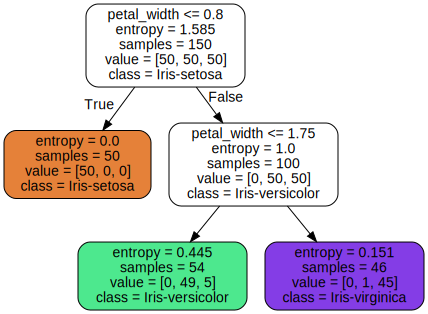

In [22]:
export_graphviz(
    tree_clf,
    out_file="iris_tree2.dot",
    feature_names=iris.columns[2:4],
    class_names=cat_class.categories,
    rounded=True,
    filled=True
)
graph_a = pydotplus.graph_from_dot_file('iris_tree2.dot')
display(SVG(graph_a.create_svg()))

In [23]:
# Create a grid of test samples
x1s = np.linspace(0, 7, 100)
x2s = np.linspace(0, 3, 100)
x1, x2 = np.meshgrid(x1s, x2s)

In [24]:
# Predict 
# np.c_() - translates slice objects to concatenation along the second axis.
# ndarray.ravel() - return a contiguous flattened array
X_new = np.c_[x1.ravel(), x2.ravel()]
y_pred = tree_clf.predict(X_new).reshape(x1.shape)

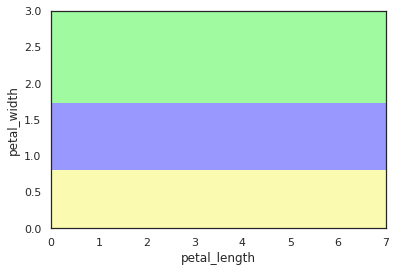

In [25]:
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
fig, ax = plt.subplots()
_ = sns.scatterplot(x="petal_length", y="petal_width", data=iris, ax=ax)
_ = ax.contourf(x1, x2, y_pred, cmap=custom_cmap)